<a href="https://colab.research.google.com/github/patty-gz02/ProcessImagenes/blob/main/PruebaFiltros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving ave.png to ave.png


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.io as sk
import skimage.color as skcolor
import numpy as np
import cv2

MUESTREO Y CUANTIFICACION

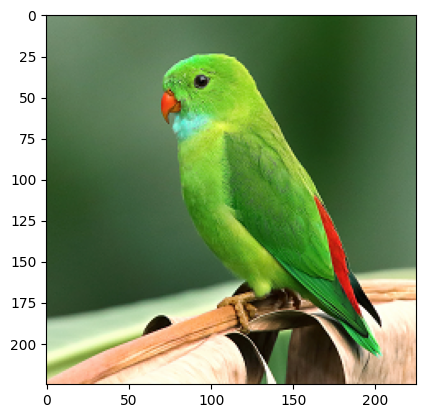

In [ ]:
imagen2=sk.imread("ave.png")
plt.imshow(imagen2)

(225, 225, 4)
[[141 141 141 ... 112 114 114]
 [139 140 138 ... 113 111 115]
 [140 139 142 ... 112 114 115]
 ...
 [218 224 220 ... 204 198 203]
 [210 207 209 ... 213 209 206]
 [207 207 206 ... 217 214 215]]


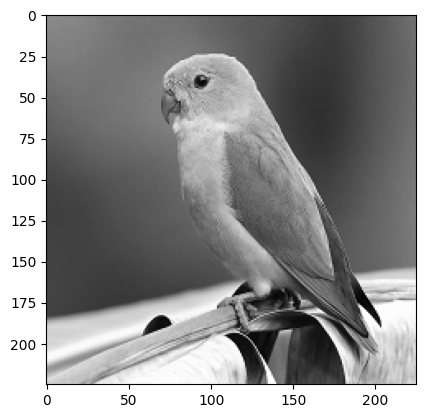

In [ ]:
imagen2=sk.imread("ave.png")
print(imagen2.shape)
imagenrgb=imagen2[:,:,:3]
imagengris=(skcolor.rgb2gray(imagenrgb)*255).astype(np.uint8)
print(imagengris)
plt.imshow(imagengris, cmap="gray")

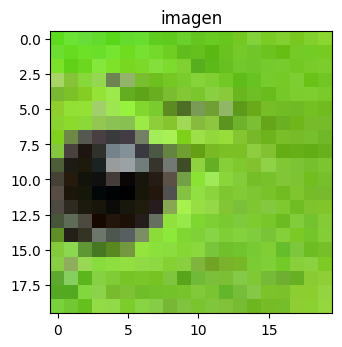

In [ ]:
muestreo=(imagenrgb)[30:50,90:110]
plt.figure(1,figsize=(8,10))
plt.subplot(1,2,2)
plt.imshow(imagenrgb,cmap="gray")
plt.title("imagen")

plt.subplot(1,2,2)
plt.imshow(muestreo,cmap="gray")

In [ ]:
print(imagen2.shape)


(3000, 4000, 3)


In [ ]:
rgb=imagen2[:,:,:]
print(rgb)

[[[113  93 105]
  [113  93 105]
  [114  94 106]
  ...
  [112  95 105]
  [111  94 104]
  [114  97 107]]

 [[111  91 103]
  [110  90 102]
  [110  90 102]
  ...
  [108  91 101]
  [108  91 101]
  [111  94 104]]

 [[112  92 104]
  [110  90 102]
  [109  89 101]
  ...
  [106  89  99]
  [107  90 100]
  [108  91 101]]

 ...

 [[117 117 105]
  [114 114 102]
  [114 114 102]
  ...
  [ 97  87  85]
  [ 97  87  85]
  [ 97  87  85]]

 [[122 122 110]
  [118 118 106]
  [115 115 103]
  ...
  [101  91  89]
  [102  92  90]
  [103  93  91]]

 [[115 115 103]
  [113 113 101]
  [109 109  97]
  ...
  [ 98  88  86]
  [ 99  89  87]
  [ 98  88  86]]]


In [ ]:
print(imagengris)

[[ 98  98  99 ...  99  98 101]
 [ 96  95  95 ...  95  95  98]
 [ 97  95  94 ...  93  94  95]
 ...
 [116 113 113 ...  88  88  88]
 [121 117 114 ...  92  93  94]
 [114 112 108 ...  89  90  89]]


SEGMENTAR

(3000, 4000, 3)


Text(0.5, 1.0, 'imagen')

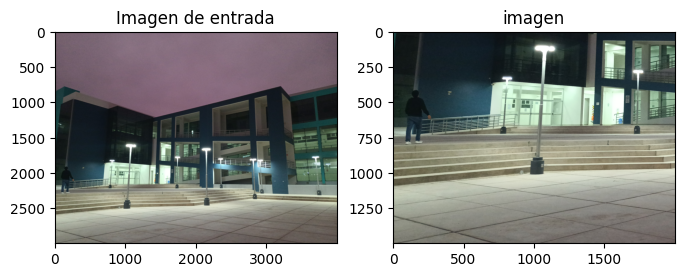

In [ ]:
a=mpimg.imread("IMG_20230616_173408[1].png")
dim=np.shape(a)
print(dim)
a_recorte_1=a[int(dim[0]/2):int(dim[0]),0:int(dim[1]/2)]
plt.figure(1,figsize=(8,10))
plt.subplot(1,2,1)
plt.imshow(a,cmap="gray")
plt.title("Imagen de entrada")

plt.subplot(1,2,2) #selecciono la seg img
plt.imshow(a_recorte_1,cmap="gray")
plt.title("imagen")

In [ ]:
print(a_recorte_1.shape)

(1500, 2000, 3)


CONVOLUCIONAR

In [ ]:
def filtrar(m,filtro):
  mr=np.multiply(m,filtro)
  return sum(sum(mr))

def convolucion(imagen, filtro):
  r=np.zeros(imagen.shape)
  fi,ci=imagen.shape
  for i in range (fi-2):
    for j in range (ci-2):
      r[i,j]=filtrar(imagen[i:i+3,j:j+3],filtro)
  return r

FILTROS

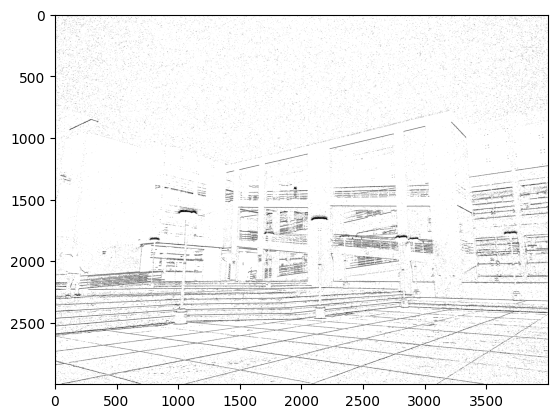

In [ ]:
#FILTRO HORIZONTAL
fh=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
resultado=convolucion(imagengris,fh)
plt.imshow(resultado<32,cmap="gray")

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


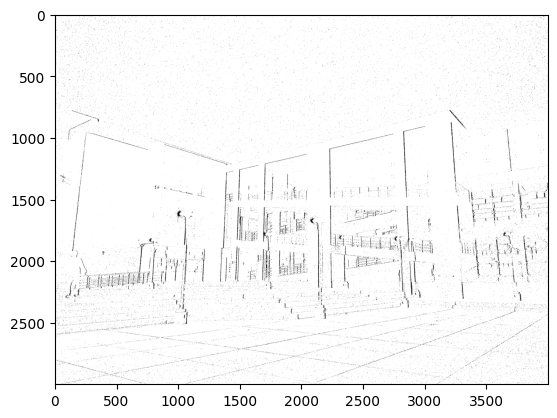

In [ ]:
#FILTRO VERTICAL
fv=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(fv)
resultado2=convolucion(imagengris,fv)
plt.imshow(resultado2<32,cmap="gray")

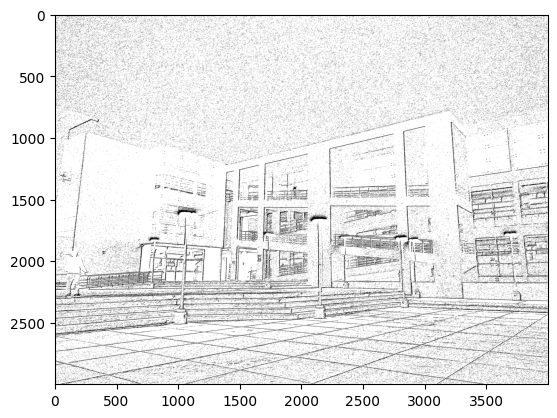

In [ ]:
resultadoFinal=resultado+resultado2
plt.imshow(resultadoFinal<32,cmap="gray")

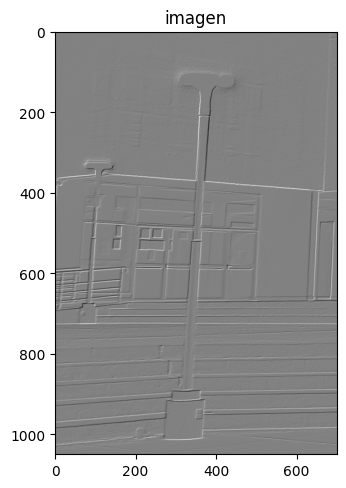

In [ ]:
a=resultado+resultado2
b=(a)[1500:2550,700:1400]
plt.figure(1,figsize=(8,10))
plt.subplot(1,2,2)
plt.imshow(a,cmap="gray")
plt.title("imagen")

plt.subplot(1,2,2)
plt.imshow(b,cmap="gray")

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


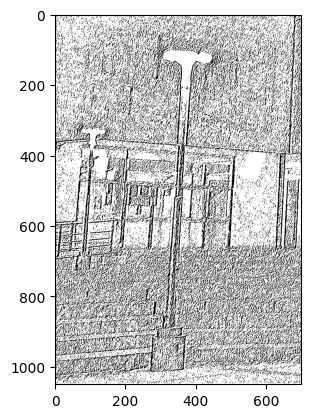

In [ ]:
#FILTRO VERTICAL
fv=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(fv)
resultado2=convolucion(b,fv)
plt.imshow(resultado2<32,cmap="gray")

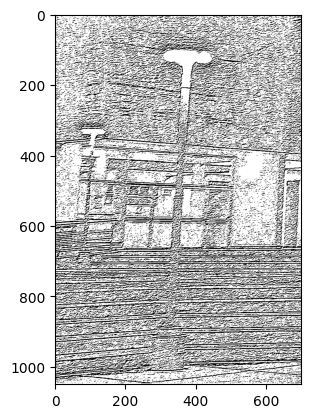

In [ ]:
#FILTRO HORIZONTAL
fh=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
resultado=convolucion(b,fh)
plt.imshow(resultado<32,cmap="gray")

Text(0.5, 1.0, 'cuarta parte')

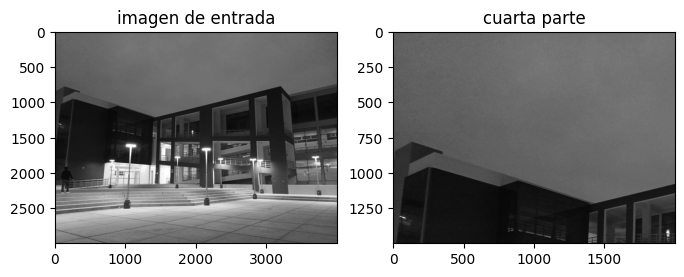

In [ ]:
dim=np.shape(imagengris)
parte=imagengris[0:int(dim[0]/2),0:int(dim[1]/2)]
plt.figure(1,figsize=(8,10))
plt.subplot(1,2,1)
plt.imshow(imagengris,cmap="gray")
plt.title("imagen de entrada")
plt.subplot(1,2,2)
plt.imshow(parte,cmap="gray")
plt.title("cuarta parte")

ESTEGANOGRAFIAR

In [ ]:
from google.colab import files
upload=files.upload()

Saving logo_episi.png to logo_episi.png


In [ ]:
imagen1=sk.imread("IMG_20230616_173408[1].png")
imagen2=sk.imread("logo_episi.png")
imagen2=imagen2[:,:,:3]
v=(skcolor.rgb2gray(imagen1)*255).astype(np.uint8)
b=(skcolor.rgb2gray(imagen2)*255).astype(np.uint8)
print(a)
print(b)

[[-16. -10.  -4. ... -10.   0.   0.]
 [ -6.   0.   0. ...  12.   0.   0.]
 [ -2.  14.  24. ...  24.   0.   0.]
 ...
 [-32. -24. -20. ...  10.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(3000, 4000)
(536, 547)


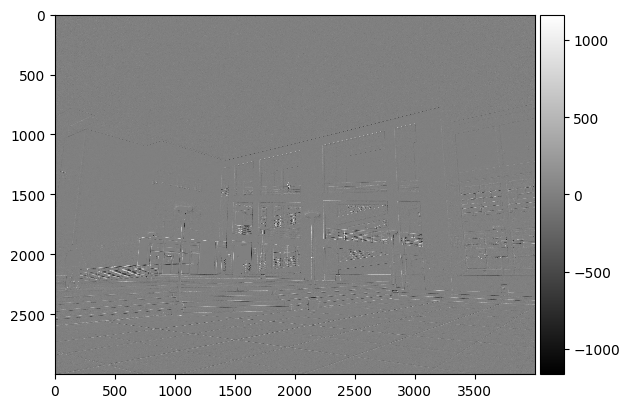

In [ ]:
sk.imshow(a,cmap='gray')
print(v.shape)
print(b.shape)

In [ ]:
est = cv2.resize(b,dsize=x.shape[::-1], interpolation = cv2.INTER_CUBIC)
dim1=x.shape
dim2=b.shape
print(dim1)
print(dim2)
print(est.shape)

(3000, 4000)
(536, 547)
(3000, 4000)


In [ ]:
a_7=a&128
a_6=a&64
a_5=a&32
a_4=a&16

est_7=est&128
est_6=est&64
est_5=est&32
est_4=est&16

a_3=(est_7/128)*32
a_2=(est_6/64)*8
a_1=(est_5/32)*2
a_0=(est_4/16)*2


new=a_7+a_6+a_5+a_4+a_3+a_2+a_1+a_0

TypeError: ignored

Text(0.5, 1.0, 'Imagen resultante')

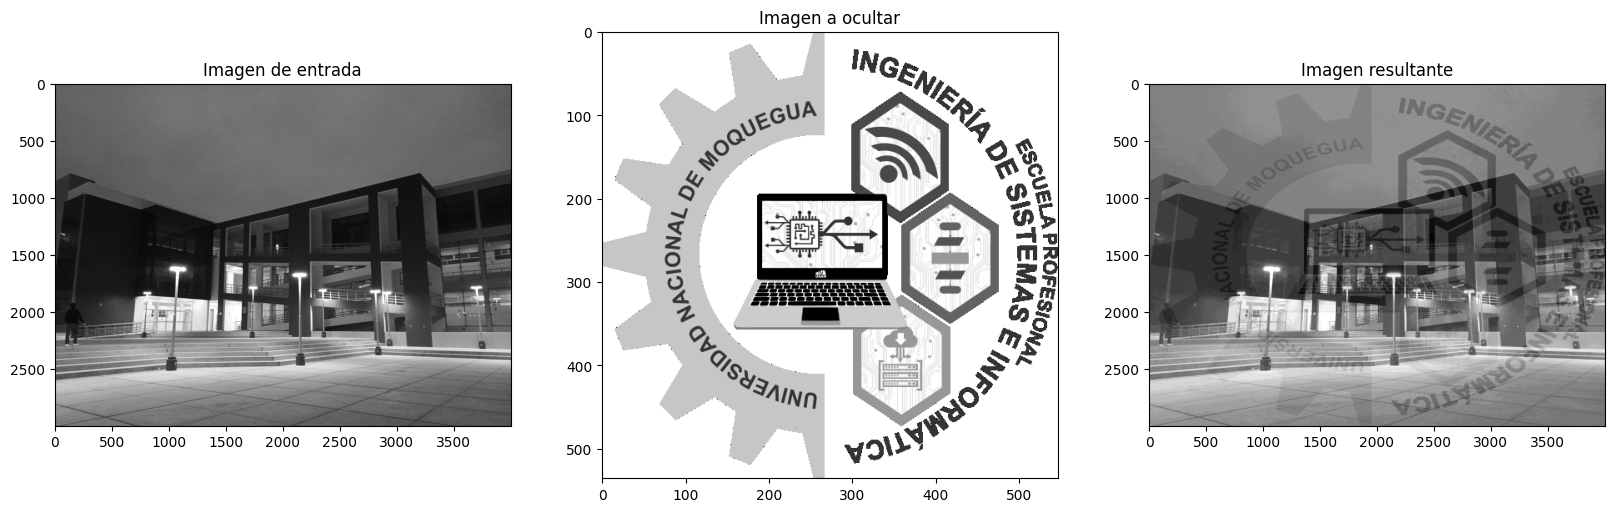

In [ ]:
plt.figure(1,figsize=(20,12))

plt.subplot(1,3,1)
plt.imshow(a,cmap="gray")
plt.title("Imagen de entrada")

plt.subplot(1,3,2)
plt.imshow(b,cmap="gray")
plt.title("Imagen a ocultar")

plt.subplot(1,3,3)
plt.imshow(new,cmap="gray")
plt.title("Imagen resultante")